In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state
from qiskit.quantum_info import partial_trace, Statevector

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import state_fidelity

from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

import matplotlib.pyplot as plt

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-education', group='iit-madras-1', project='quantum-computin')

In [3]:
for backend in provider.backends():
    print(backend)

ibmq_qasm_simulator
ibmq_16_melbourne
ibmq_armonk
ibmq_santiago
ibmq_bogota
ibmq_casablanca
ibmq_lima
ibmq_belem
ibmq_quito
ibmq_jakarta
ibmq_manila


In [3]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 2 and
                                       not b.configuration().simulator and b.status().operational==True))
backend = provider.backends()[]
def run_on_hardware(qc, n):
    backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= n and
                                       not b.configuration().simulator and b.status().operational==True))
    print("Running on backend:", backend)
    t_qc = transpile(qc, backend, optimization_level=3)
    job = backend.run(t_qc)
    job_monitor(job)
    exp_result = job.result()
    exp_counts = exp_result.get_counts(qc)
    print(exp_counts)
    return exp_counts

Traceback (most recent call last):
  File "<ipython-input-3-aeef401f47bf>", line 1, in <module>
    backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 2 and
  File "/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqbackendservice.py", line 581, in __call__
    return self._backend_service.backends(*args, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqbackendservice.py", line 146, in backends
    return filter_backends(backends, filters=filters, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/qiskit/providers/providerutils.py", line 65, in filter_backends
    backends = list(filter(filters, backends))
  File "<ipython-input-3-aeef401f47bf>", line 2, in <lambda>
    not b.configuration().simulator and b.status().operational==True))
  File "/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqbackend.py", line 463, in status
    api_status = self._api_client.backend_status(self.name

# Bell pairs and Quantum Teleportation

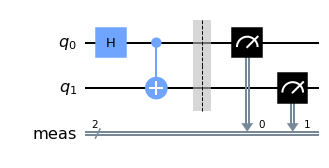

In [55]:
qc0 = QuantumCircuit(2)
qc0.h(0)
qc0.cx(0,1)
state = Statevector.from_instruction(qc0)
# plot_state_qsphere(state)
qc0.measure_all()
qc0.draw(output="mpl")
# plt.show()

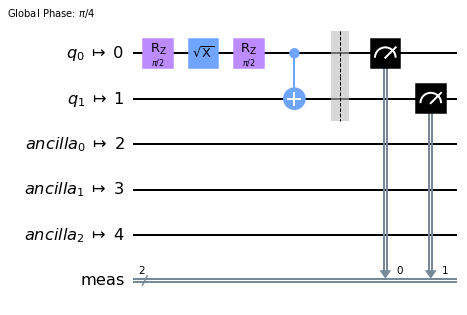

In [56]:
t_qc = transpile(qc0, backend, optimization_level=3)
t_qc.draw()

In [58]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc0).result()
counts = result.get_counts(qc0)

In [55]:
counts = run_on_hardware(t_qc, 2)
plot_histogram(counts)

Traceback (most recent call last):
  File "<ipython-input-55-6ca1d5a225fc>", line 1, in <module>
    counts = run_on_hardware(t_qc, 2)
NameError: name 't_qc' is not defined

Use %tb to get the full traceback.


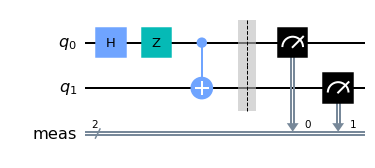

In [145]:
qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.z(0)
# qc1.h(0)
# qc1.h(0)
qc1.cx(0,1)
state = Statevector.from_instruction(qc1)
# plot_state_qsphere(state)
qc1.measure_all()
qc1.draw(output="mpl")
# plt.show()

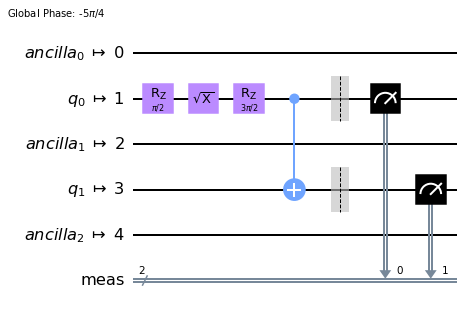

In [146]:
t_qc = transpile(qc1, backend, optimization_level=3)
t_qc.draw()

Running on backend: ibmq_belem
Job Status: job has successfully run
{'00': 515, '01': 28, '10': 58, '11': 423}


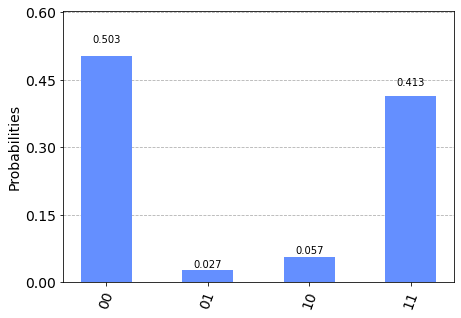

In [148]:
counts = run_on_hardware(t_qc, 3)
plot_histogram(counts)

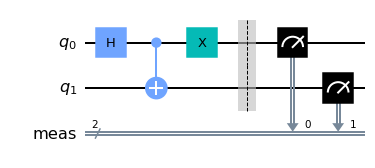

In [149]:
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.cx(0,1)
qc2.x(0)
state = Statevector.from_instruction(qc2)
# plot_state_qsphere(state)
qc2.measure_all()
qc2.draw(output="mpl")
# plt.show()

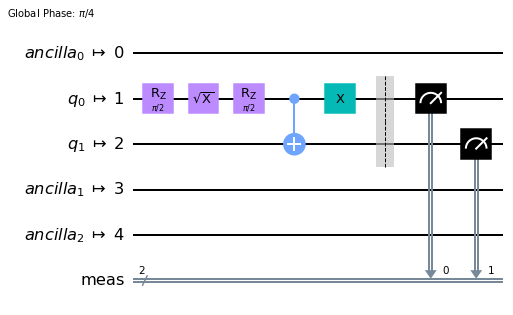

In [150]:
t_qc = transpile(qc2, backend, optimization_level=3)
t_qc.draw()

Running on backend: ibmq_belem
Job Status: job has successfully run
{'00': 74, '01': 433, '10': 507, '11': 10}


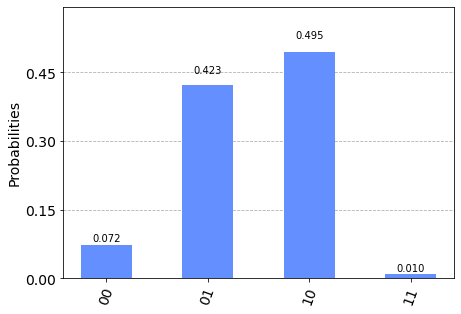

In [151]:
counts = run_on_hardware(t_qc, 2)
plot_histogram(counts)

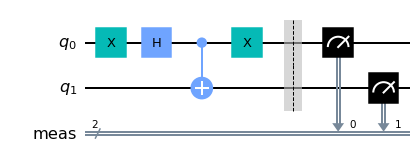

In [153]:
qc3 = QuantumCircuit(2)
qc3.x(0)
qc3.h(0)
qc3.cx(0,1)
qc3.x(0)
state = Statevector.from_instruction(qc3)
# plot_state_qsphere(state)
qc3.measure_all()
qc3.draw(output="mpl")

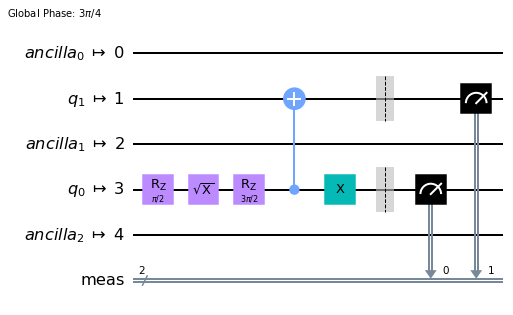

In [154]:
t_qc = transpile(qc3, backend, optimization_level=3)
t_qc.draw()

Running on backend: ibmq_belem
Job Status: job has successfully run
{'00': 62, '01': 509, '10': 438, '11': 15}


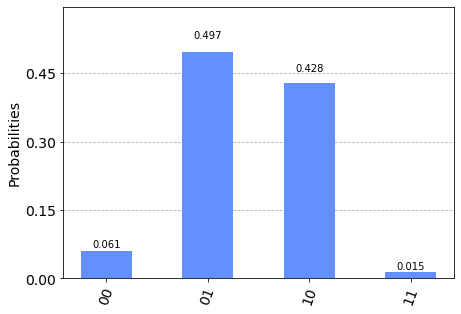

In [155]:
counts = run_on_hardware(t_qc, 2)
plot_histogram(counts)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


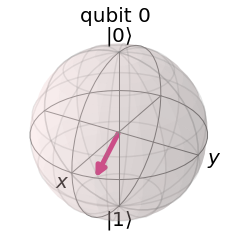

In [105]:
Alice = QuantumRegister(2)
Bob = QuantumRegister(1)
mx = ClassicalRegister(1)
mz = ClassicalRegister(1)
qc = QuantumCircuit(Alice, Bob, mx,mz)

psi = random_state(1)
plot_bloch_multivector(psi)

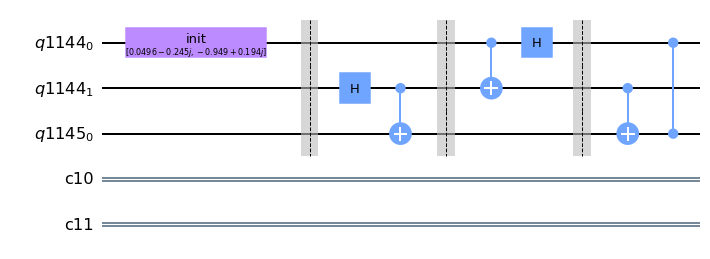

In [106]:
init_gate = Initialize(psi)
init_gate.label = "init"

qc.append(init_gate, [0])
qc.barrier()

qc.h(Alice[1])
qc.cx(Alice[1],Bob)
qc.barrier()
qc.cx(Alice[0],Alice[1])
qc.h(Alice[0])
qc.barrier()
qc.cx(Alice[1],Bob)
qc.cz(Alice[0],Bob)
qc.draw(output="mpl")

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


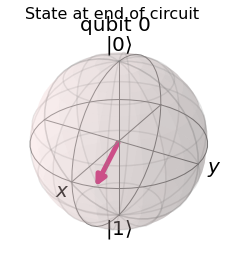

In [110]:
sim = Aer.get_backend('statevector_simulator')
job = execute(qc, sim)
out_vector = job.result().get_statevector()
plot_bloch_multivector(partial_trace(out_vector,[0,1]),title="State at end of circuit")

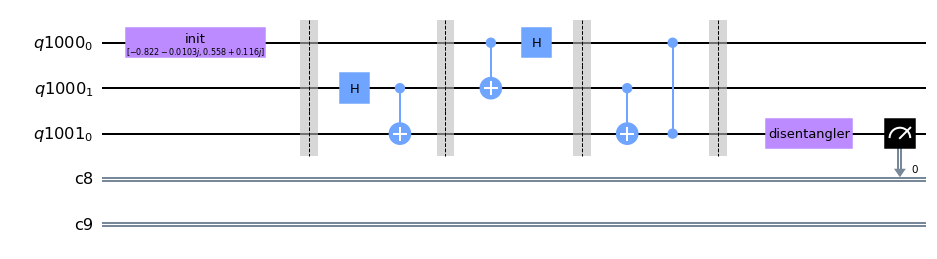

In [100]:
inverse_init_gate = init_gate.gates_to_uncompute()
qc.barrier()
qc.append(inverse_init_gate, Bob)
qc.measure(Bob, mx)
qc.draw()

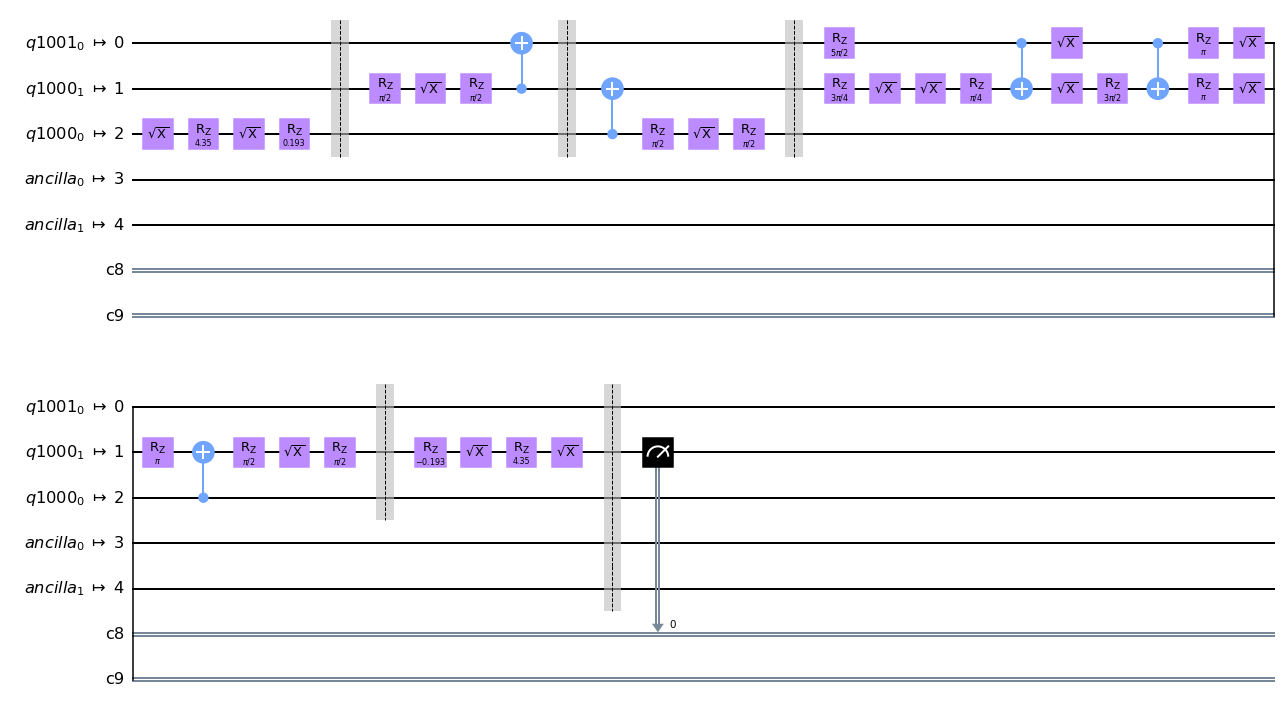

In [101]:
t_qc = transpile(qc, backend, optimization_level=3)
t_qc.draw()

Running on backend: ibmq_lima
Job Status: job has successfully run
{'0 0': 951, '0 1': 73}


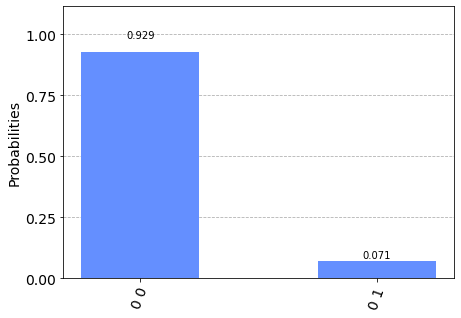

In [51]:
counts = run_on_hardware(qc, 3)
plot_histogram(counts)

# Superdense Coding

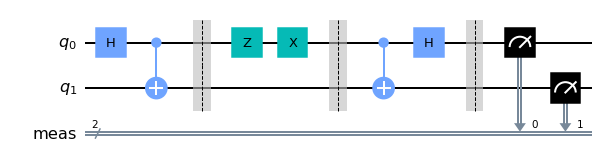

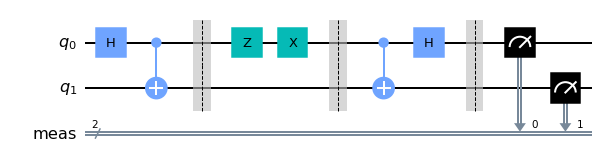

In [117]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.barrier()
message = "11"
if message == "01":
    qc.z(0)
elif message == "10":
    qc.x(0)
elif message == "11":
    qc.z(0)
    qc.x(0)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.measure_all()
qc.draw()

{'11': 1024}


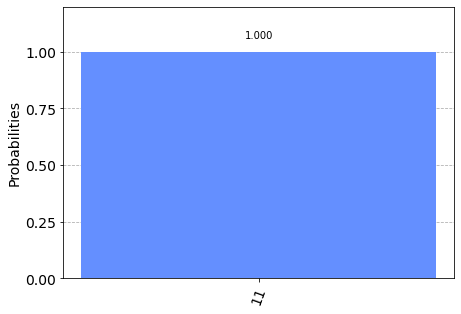

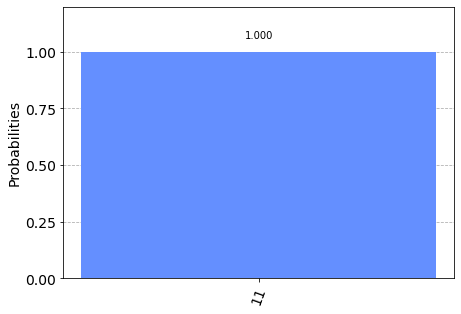

In [118]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

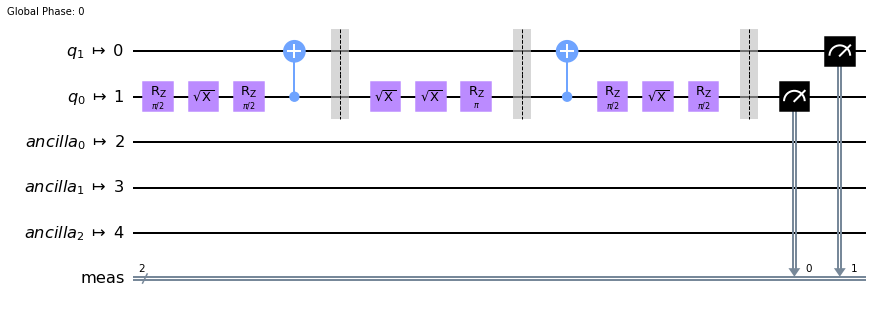

In [159]:
t_qc = transpile(qc, backend, optimization_level=3)
t_qc.draw()

Running on backend: ibmq_belem
Job Status: job has successfully run
{'00': 23, '01': 72, '10': 144, '11': 785}


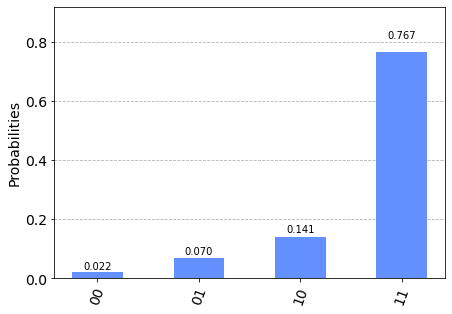

In [160]:
counts = run_on_hardware(qc, 2)
plot_histogram(counts)

# Oracles and Deutsch-Josza Algorithm

In [161]:
n = 4
constant = 1
b_bitstring = "1010"
balanced = QuantumCircuit(n+1)
const = QuantumCircuit(n+1)
if constant:
    const.x(n)
else:
    pass

for index, i in enumerate(b_bitstring):
    if i=="1":
        balanced.x(index)
    balanced.cx(index, n)
    if i=="1":
        balanced.x(index)
    
print(const)
print(balanced)

          
q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
     ┌───┐
q_4: ┤ X ├
     └───┘
     ┌───┐     ┌───┐          
q_0: ┤ X ├──■──┤ X ├──────────
     └───┘  │  └───┘          
q_1: ───────┼────■────────────
     ┌───┐  │    │       ┌───┐
q_2: ┤ X ├──┼────┼────■──┤ X ├
     └───┘  │    │    │  └───┘
q_3: ───────┼────┼────┼────■──
          ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐
q_4: ─────┤ X ├┤ X ├┤ X ├┤ X ├
          └───┘└───┘└───┘└───┘


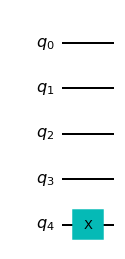

In [111]:
const.draw()

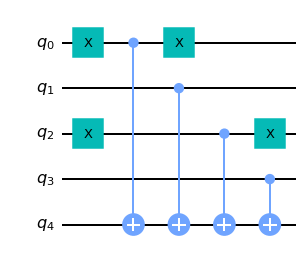

In [112]:
balanced.draw()

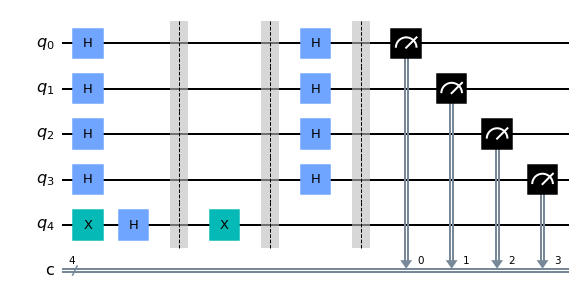

In [162]:
oracle = 1 # 0 for balanced, 1 for constant
qc = QuantumCircuit(n+1, n)
qc.x(n)
qc.h(range(n+1))
qc.barrier()
if oracle:
    qc += const
else:
    qc += balanced
qc.barrier()
qc.h(range(n))
qc.barrier()
qc.measure(range(n), range(n))
qc.draw()

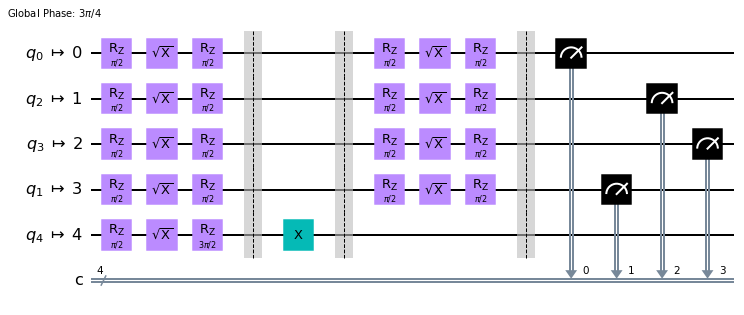

In [163]:
t_qc = transpile(qc, backend, optimization_level=3)
t_qc.draw()

{'0000': 1024}


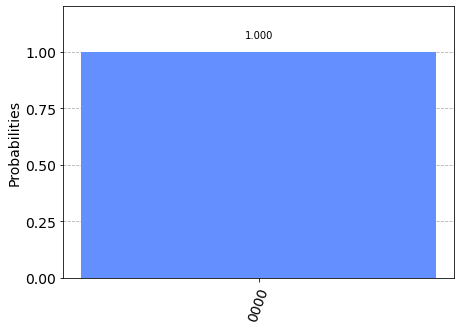

In [164]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

Running on backend: ibmq_lima
Job Status: job has successfully run
{'0000': 16, '0001': 11, '0010': 17, '0011': 22, '0100': 10, '0101': 37, '0110': 34, '0111': 91, '1000': 10, '1001': 9, '1010': 15, '1011': 29, '1100': 56, '1101': 108, '1110': 125, '1111': 434}


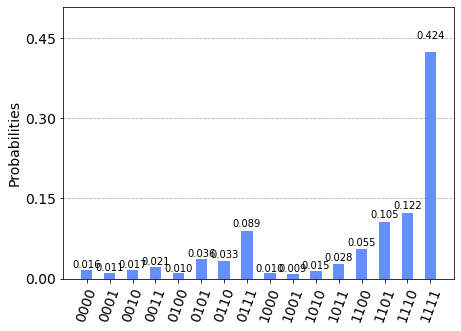

In [115]:
counts = run_on_hardware(qc, n+1)
plot_histogram(counts)

# Tomography Basics

In [13]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import state_fidelity

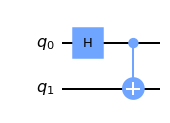

In [14]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw()

In [15]:
job = execute(qc, Aer.get_backend('statevector_simulator'))
psi_exp = job.result().get_statevector(qc)
print(psi_exp)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [16]:
qst_swap = state_tomography_circuits(qc, [0,1])
job = execute(qst_swap, Aer.get_backend('qasm_simulator'), shots=5000)
tomo_swap = StateTomographyFitter(job.result(), qst_swap)
rho_swap = tomo_swap.fit()
F_swap = state_fidelity(psi_exp, rho_swap)
print('Fit Fidelity =', F_swap)

/opt/conda/lib/python3.8/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:468: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  prep += circuit
/opt/conda/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:876: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)
/opt/conda/lib/python3.8/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:478: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = prep + meas
/opt/conda/lib/python3.8/site-packages/qiskit/circui

Fit Fidelity = 0.9973442047490821


In [17]:
backend = provider.backends()[8]
print("Running on backend:", backend)
t_qc = transpile(qst_swap, backend, optimization_level=3)
job = backend.run(t_qc)
job_monitor(job)
exp_result = job.result()
tomo_swap = StateTomographyFitter(job.result(), t_qc)
rho_swap = tomo_swap.fit()
F_swap = state_fidelity(psi_exp, rho_swap)
print('Fit Fidelity =', F_swap)

Running on backend: ibmq_belem
Job Status: job has successfully run
Fit Fidelity = 0.8525472355904659


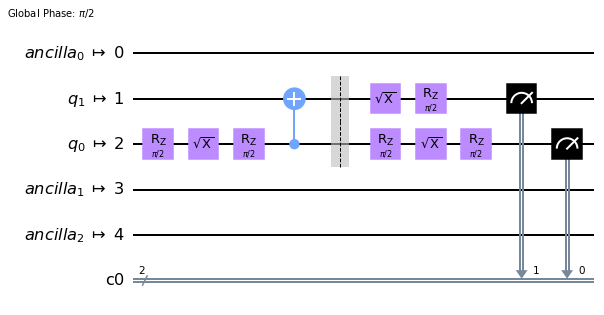

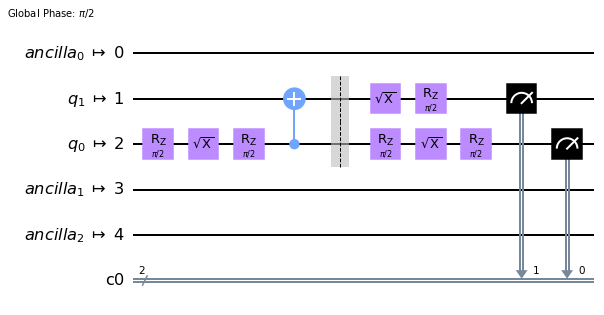

In [17]:
t_qc[1].draw()

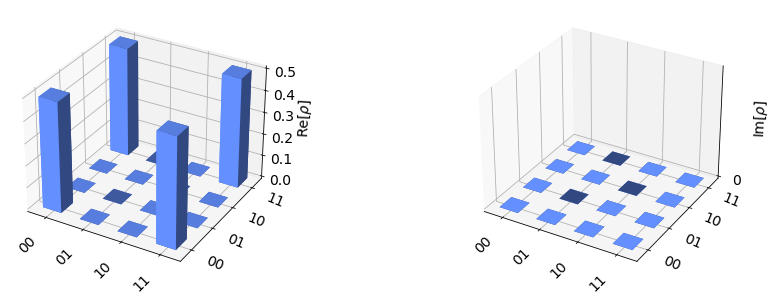

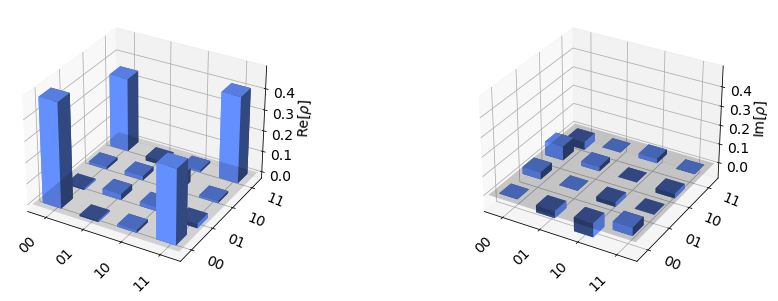

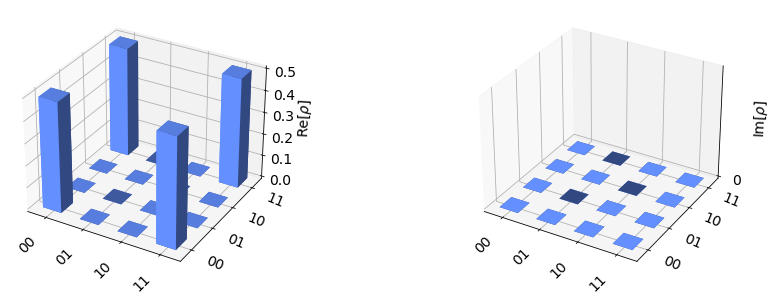

In [60]:
plot_state_city(rho_swap)
plot_state_city(psi_exp)

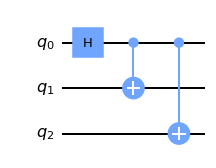

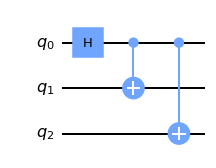

In [51]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,[1,2])
qc.draw()

In [52]:
job = execute(qc, Aer.get_backend('statevector_simulator'))
psi_exp = job.result().get_statevector(qc)
print(psi_exp)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [53]:
qst_swap = state_tomography_circuits(qc, [0,1,2])
job = execute(qst_swap, Aer.get_backend('qasm_simulator'), shots=5000)
tomo_swap = StateTomographyFitter(job.result(), qst_swap)
rho_swap = tomo_swap.fit()
F_swap = state_fidelity(psi_exp, rho_swap)
print('Fit Fidelity =', F_swap)

Fit Fidelity = 0.9930300230197289


In [54]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                       not b.configuration().simulator and b.status().operational==True))
print("Running on backend:", backend)
t_qc = transpile(qst_swap, backend, optimization_level=3)
job = backend.run(t_qc)
job_monitor(job)
exp_result = job.result()
tomo_swap = StateTomographyFitter(job.result(), t_qc)
rho_swap = tomo_swap.fit()
F_swap = state_fidelity(psi_exp, rho_swap)
print('Fit Fidelity =', F_swap)

Running on backend: ibmq_belem
Job Status: job has successfully run
Fit Fidelity = 0.7302687469130776


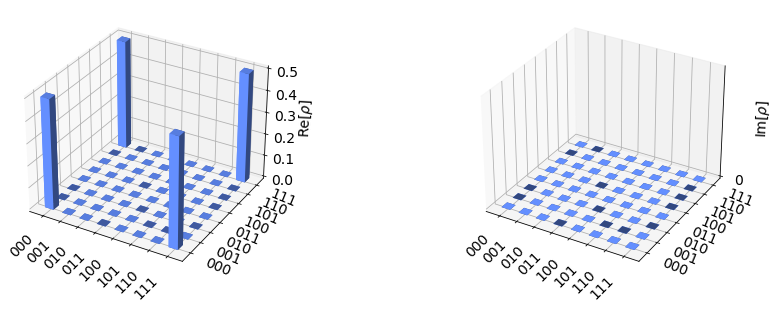

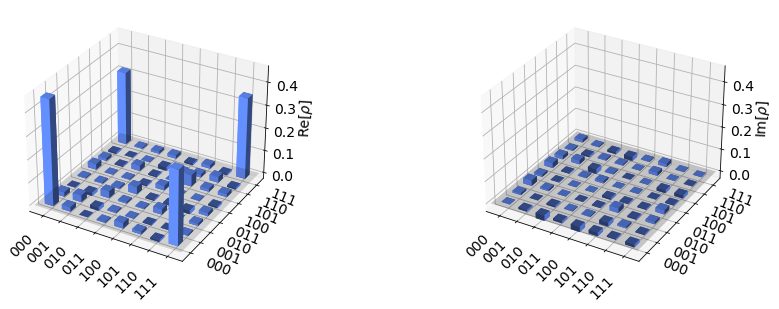

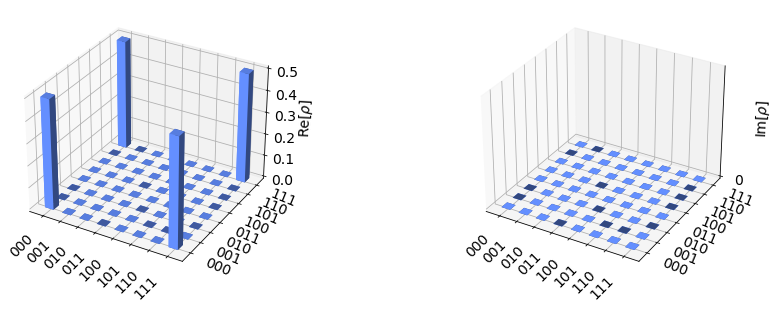

In [55]:
plot_state_city(rho_swap)
plot_state_city(psi_exp)

27


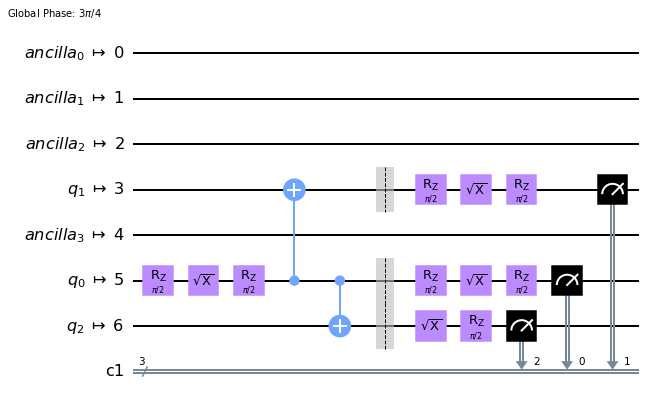

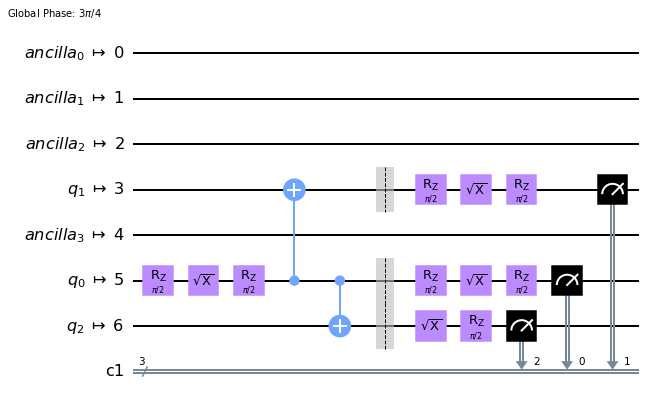

In [22]:
print(len(t_qc))
t_qc[1].draw()

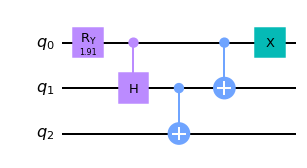

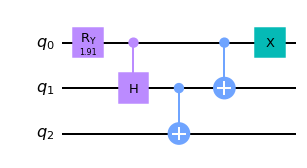

In [45]:
from numpy import pi
qc = QuantumCircuit(3)
# 2*arccos(1/sqrt(3))
qc.ry(1.9106332362490184, 0)
qc.ch(0,1)
qc.cx(1, 2)
qc.cx(0, 1)
qc.x(0)
qc.draw()

In [46]:
job = execute(qc, Aer.get_backend('statevector_simulator'))
psi_exp = job.result().get_statevector(qc)
print(psi_exp)

[ 0.00000000e+00+0.00000000e+00j  5.77350269e-01+5.12173487e-17j
  5.77350269e-01+5.55111512e-17j  0.00000000e+00+0.00000000e+00j
  5.77350269e-01+1.66533454e-16j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j -2.77555756e-17+4.29380249e-18j]


In [48]:
qst_swap = state_tomography_circuits(qc, [0,1,2])
job = execute(qst_swap, Aer.get_backend('qasm_simulator'), shots=5000)
tomo_swap = StateTomographyFitter(job.result(), qst_swap)
rho_swap = tomo_swap.fit()
F_swap = state_fidelity(psi_exp, rho_swap)
print('Fit Fidelity =', F_swap)

Fit Fidelity = 0.9947184569730934


In [49]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                       not b.configuration().simulator and b.status().operational==True and b.configuration().max_experiments>=81))
print("Running on backend:", backend)
t_qc = transpile(qst_swap, backend, optimization_level=3)
job = backend.run(t_qc)
job_monitor(job)
exp_result = job.result()
tomo_swap = StateTomographyFitter(job.result(), t_qc)
rho_swap = tomo_swap.fit()
F_swap = state_fidelity(psi_exp, rho_swap)
print('Fit Fidelity =', F_swap)

Running on backend: ibmq_jakarta
Job Status: job has successfully run
Fit Fidelity = 0.8594210331408797


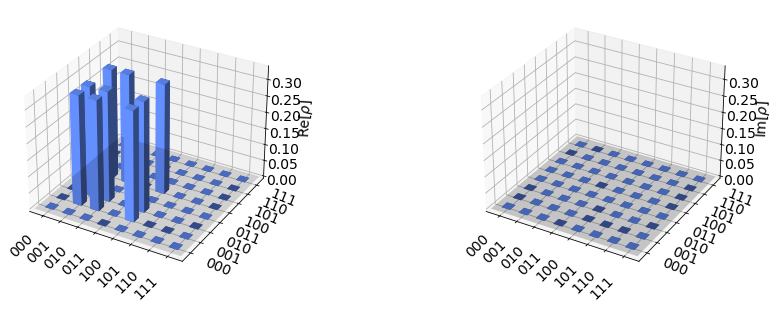

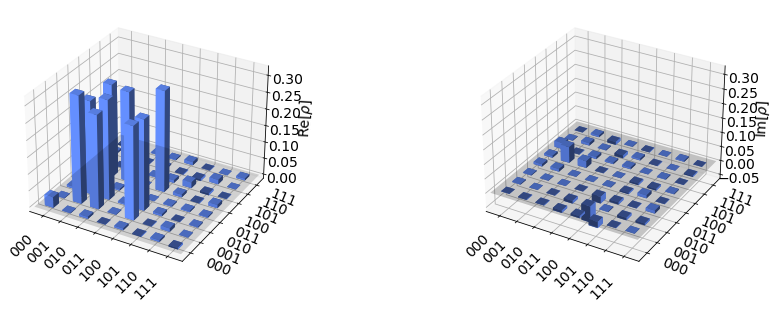

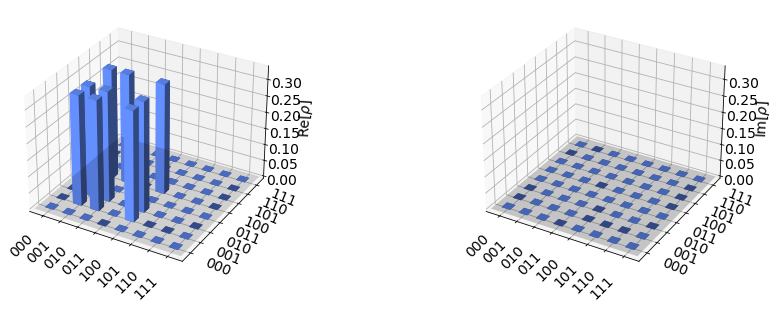

In [50]:
plot_state_city(rho_swap)
plot_state_city(psi_exp)

# Entanglement Swapping

In [ ]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import state_fidelity

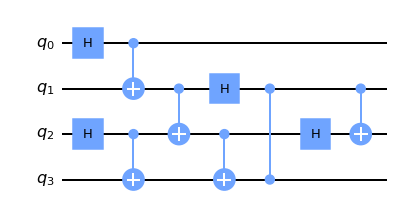

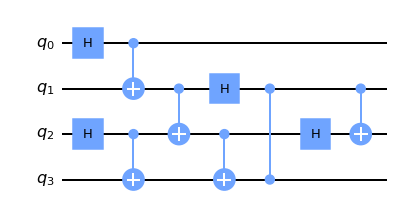

In [37]:
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.h(2)
qc.cx(2,3)
qc.cx(1,2)
qc.cx(2,3)
qc.h(1)
qc.cz(1,3)
qc.h(2)
qc.cx(1,2)
qc.draw()

In [38]:
job = execute(qc, Aer.get_backend('statevector_simulator'))
psi_exp = job.result().get_statevector(qc)
print(psi_exp)

[ 5.00000000e-01-3.06161700e-17j  0.00000000e+00+0.00000000e+00j
  5.07326818e-18+3.06161700e-17j  0.00000000e+00+0.00000000e+00j
  2.13321079e-17+3.06161700e-17j  0.00000000e+00+0.00000000e+00j
  5.00000000e-01-3.06161700e-17j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  5.00000000e-01-9.18485099e-17j
  0.00000000e+00+0.00000000e+00j -8.96901945e-17+3.06161700e-17j
  0.00000000e+00+0.00000000e+00j -7.81934587e-17+3.06161700e-17j
  0.00000000e+00+0.00000000e+00j  5.00000000e-01-9.18485099e-17j]


{'1111': 261, '1001': 251, '0110': 246, '0000': 266}


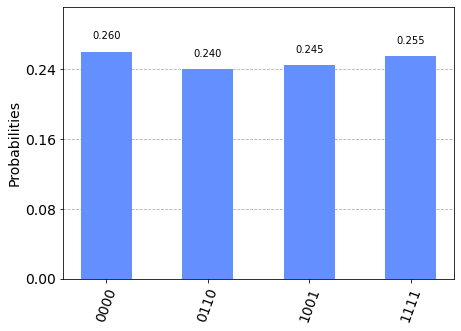

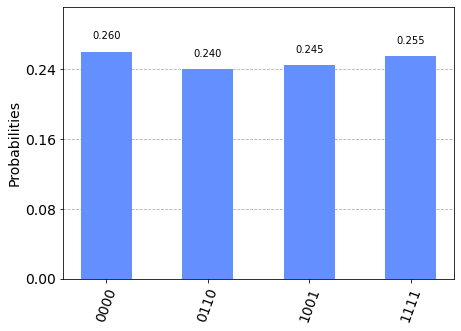

In [32]:
qc.measure_all()
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

In [39]:
qst_swap = state_tomography_circuits(qc, [0,1,2,3])
job = execute(qst_swap, Aer.get_backend('qasm_simulator'), shots=5000)
tomo_swap = StateTomographyFitter(job.result(), qst_swap)
rho_swap = tomo_swap.fit()
F_swap = state_fidelity(psi_exp, rho_swap)
print('Fit Fidelity =', F_swap)

Fit Fidelity = 0.9929553925598297


In [40]:
# job = execute(qst_swap, Aer.get_backend('qasm_simulator'), shots=5000)
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 4 and
                                       not b.configuration().simulator and b.status().operational==True and b.configuration().max_experiments>=81))
print("Running on backend:", backend)
t_qc = transpile(qst_swap, backend, optimization_level=3)
job = backend.run(t_qc)
job_monitor(job)
exp_result = job.result()
tomo_swap = StateTomographyFitter(job.result(), t_qc)
rho_swap = tomo_swap.fit()
F_swap = state_fidelity(psi_exp, rho_swap)
print('Fit Fidelity =', F_swap)

Running on backend: ibmq_jakarta
Job Status: job has successfully run
Fit Fidelity = 0.4764473280830137


In [85]:
# job = execute(qst_swap, Aer.get_backend('qasm_simulator'), shots=5000)
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 4 and
                                       not b.configuration().simulator and b.status().operational==True and b.configuration().max_experiments>=81))
print("Running on backend:", backend)
t_qc = transpile(qst_swap, backend, optimization_level=3)
job = backend.run(t_qc)
job_monitor(job)
exp_result = job.result()
tomo_swap = StateTomographyFitter(job.result(), t_qc)
rho_swap = tomo_swap.fit()
F_swap = state_fidelity(psi_exp, rho_swap)
print('Fit Fidelity =', F_swap)

Running on backend: ibmq_jakarta
Job Status: job has successfully run
Fit Fidelity = 0.5283164964395933


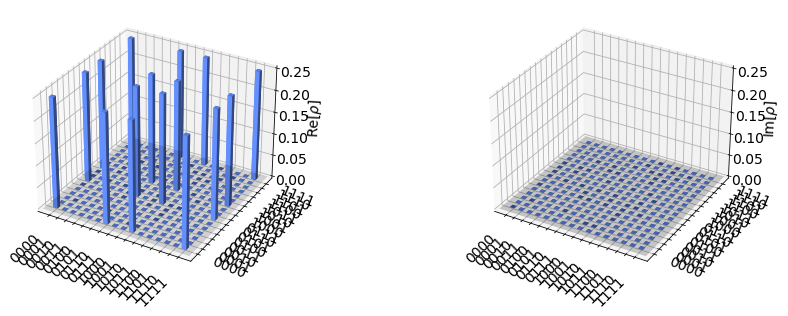

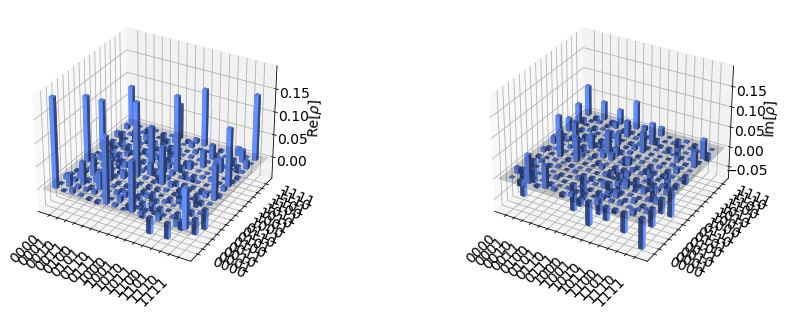

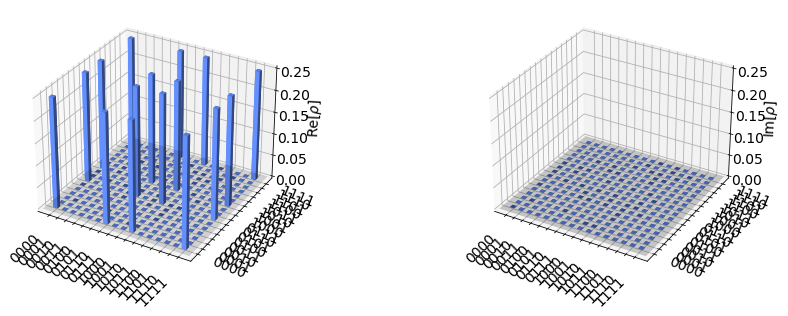

In [44]:
plot_state_city(rho_swap)
plot_state_city(psi_exp)

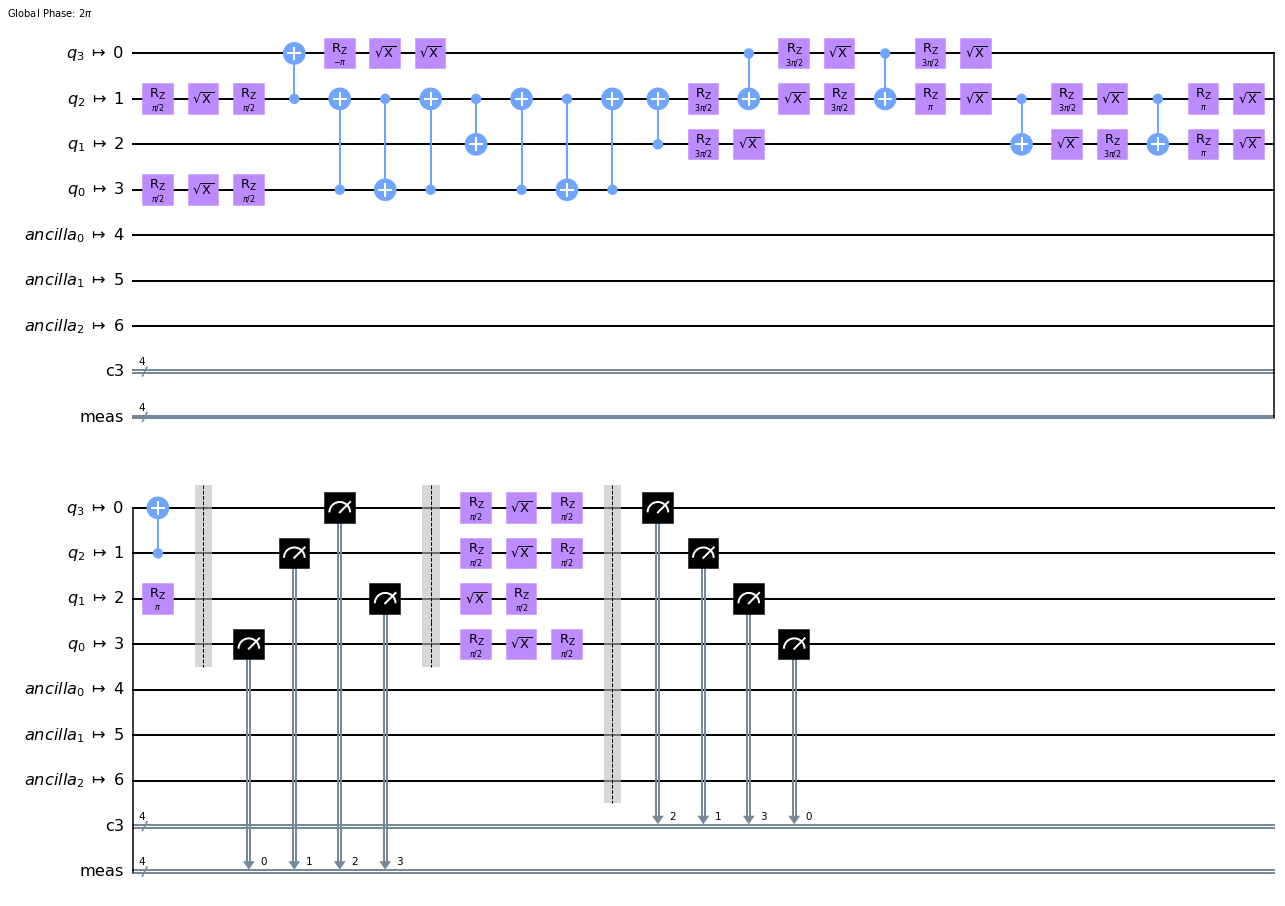

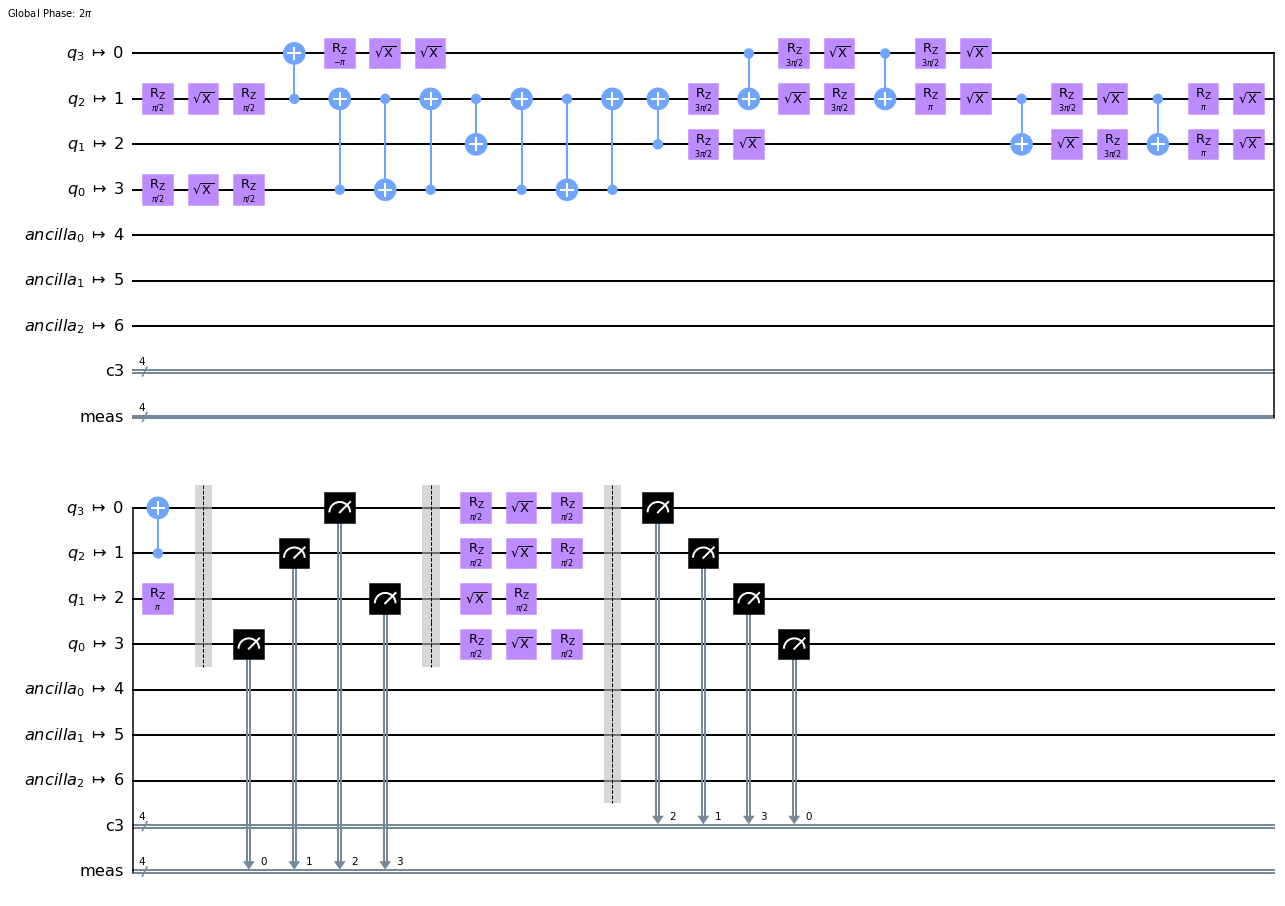

In [36]:
t_qc[1].draw()

# Quantum Error Correction

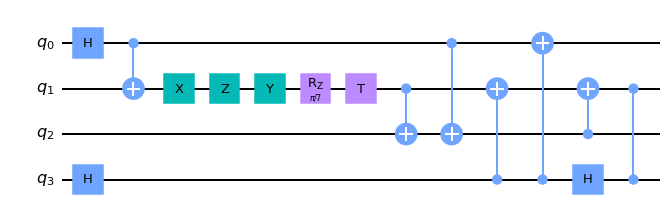

In [2]:
# Store bell state as expected density matrix
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
job = execute(qc, Aer.get_backend('statevector_simulator'))
psi_exp = job.result().get_statevector()
# print(psi_exp)

# Qreg 2 and 3 are syndrome qubits
qreg_q = QuantumRegister(4, 'q')
# creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q)

# Create bell state
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])

# Add noise(any unitary gate on second qubit)
# circuit.barrier()
circuit.x(qreg_q[1])
circuit.z(qreg_q[1])
circuit.y(qreg_q[1])
circuit.rz(np.pi/7, qreg_q[1])
circuit.t(qreg_q[1])
# circuit.barrier()

# Measure first stabiliser (XX)
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[2])

# Measure second stabiliser (ZZ)
# circuit.barrier()
circuit.h(qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[0])
circuit.h(qreg_q[3])
# circuit.barrier()

# Apply error correction
circuit.cx(qreg_q[2], qreg_q[1])
circuit.cz(qreg_q[3], qreg_q[1])

circuit.draw()

In [4]:
t_qc = transpile(circuit, optimization_level=3)

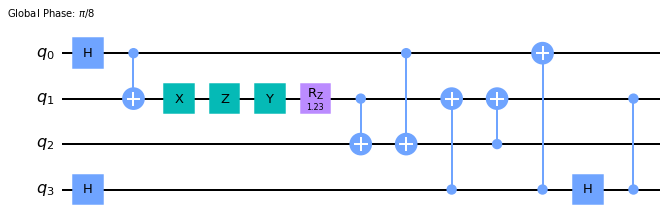

In [5]:
t_qc.draw()

In [62]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
import qiskit.ignis.mitigation.measurement as mc
from qiskit.quantum_info import state_fidelity

qst = state_tomography_circuits(circuit, [qreg_q[0], qreg_q[1]])
job = execute(qst, Aer.get_backend('qasm_simulator'), shots=5000)
tomo = StateTomographyFitter(job.result(), qst)
rho = tomo.fit()
F_swap = state_fidelity(psi_exp, rho)
print('Fit Fidelity =', F_swap)

Fit Fidelity = 0.9953946967220325


In [6]:
IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and not b.configuration().simulator and b.status().operational==True) and b.configuration().max_experiments>=9)
# backend = "ibmq_belem"
#Add measurement noise
from qiskit.providers.aer import noise

noise_model = noise.NoiseModel.from_backend(backend)

#generate the calibration circuits
meas_calibs, state_labels = mc.complete_meas_cal(qubit_list=[0,1])

# backend = Aer.get_backend('qasm_simulator')
job_cal = qiskit.execute(meas_calibs, backend=backend, shots=1024)
job_tomo = qiskit.execute(qst, backend=backend, shots=1024)

meas_fitter = mc.CompleteMeasFitter(job_cal.result(),state_labels)

tomo_bell = StateTomographyFitter(job_tomo.result(), qst_bell)

#no correction
rho_bell = tomo_bell.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_bell, target_state_bell)
print('State fidelity (no correction): F = {:.5f}'.format(F_bell))

#correct data
correct_tomo_results = meas_fitter.filter.apply(job_tomo.result(), method='least_squares')
tomo_bell_mit = StateTomographyFitter(correct_tomo_results, qst_bell)
rho_fit_bell_mit = tomo_bell_mit.fit(method='lstsq')
F_bell_mit = qi.state_fidelity(rho_fit_bell_mit, target_state_bell)
print('State fidelity (w/ correction): F = {:.5f}'.format(F_bell_mit))

Traceback (most recent call last):
  File "<ipython-input-6-11866368ae05>", line 1, in <module>
    IBMQ.get_provider(hub='ibm-q', group='open', project='main')
  File "/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py", line 424, in get_provider
    raise IBMQProviderError('No provider matches the specified criteria: '
IBMQProviderError: 'No provider matches the specified criteria: hub = ibm-q, group = open, project = main'

Use %tb to get the full traceback.


# Assignment 4: Quantum State Transfer

## Q1

     ┌─────────┐ ░          ┌───┐                                          
q_0: ┤ Ry(π/4) ├─░─────■────┤ X ├──────────────────────────────────────────
     └─────────┘ ░ ┌───┴───┐└─┬─┘         ┌───┐                            
q_1: ────────────░─┤ Rx(π) ├──■──────■────┤ X ├────────────────────────────
                 ░ └───────┘     ┌───┴───┐└─┬─┘         ┌───┐              
q_2: ────────────░───────────────┤ Rx(π) ├──■──────■────┤ X ├──────────────
                 ░               └───────┘     ┌───┴───┐└─┬─┘         ┌───┐
q_3: ────────────░─────────────────────────────┤ Rx(π) ├──■──────■────┤ X ├
                 ░                             └───────┘     ┌───┴───┐└─┬─┘
q_4: ────────────░───────────────────────────────────────────┤ Rx(π) ├──■──
                 ░                                           └───────┘     


/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


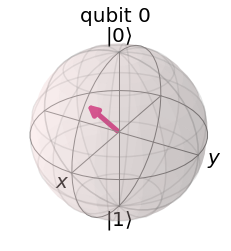

In [157]:
n = 5
trial = QuantumCircuit(1)
trial.ry(np.pi/4,[0])

sim = Aer.get_backend('statevector_simulator')
job = execute(trial, sim)
psi = job.result().get_statevector()

qc = QuantumCircuit(n)
# psi = random_state(1)
# plot_bloch_multivector(psi)
# init_gate = Initialize(psi)
# init_gate.label = "init"

t = np.pi

# qc.append(init_gate, [0])
qc.ry(np.pi/4,[0])
qc.barrier()

for i in range(n-1):
#     qc.cx(i+1,i)
    qc.crx(t,i,i+1)
    qc.cx(i+1,i)
# qc.draw()
print(qc)
plot_bloch_multivector(psi)

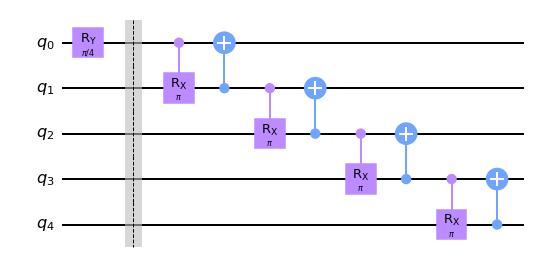

In [183]:
qc = QuantumCircuit(n)
# psi = random_state(1)
# plot_bloch_multivector(psi)
# init_gate = Initialize(psi)
# init_gate.label = "init"

t = np.pi

# qc.append(init_gate, [0])
qc.ry(np.pi/4,[0])
qc.barrier()

for i in range(n-1):
#     qc.cx(i+1,i)
    qc.crx(t,i,i+1)
    qc.cx(i+1,i)
qc.draw()

In [184]:
sim = Aer.get_backend('statevector_simulator')
job = execute(qc, sim)
out_vector = job.result().get_statevector()
if n>1:
    plot_bloch_multivector(partial_trace(out_vector,[i for i in range(n-1)]),title="State at end of circuit")
else:
    print(psi, out_vector)

In [185]:
qst = state_tomography_circuits(qc, [n-1])
job = execute(qst, Aer.get_backend('qasm_simulator'), shots=5000)
tomo = StateTomographyFitter(job.result(), qst)
rho = tomo.fit()
F_swap = state_fidelity(psi, rho)
print('Fit Fidelity =', F_swap)

Fit Fidelity = 0.9938433759806851


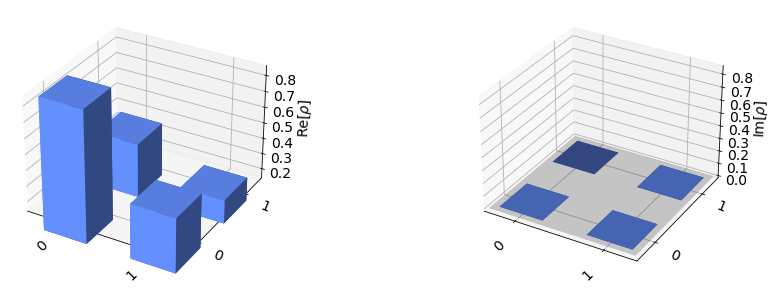

In [160]:
plot_state_city(rho)

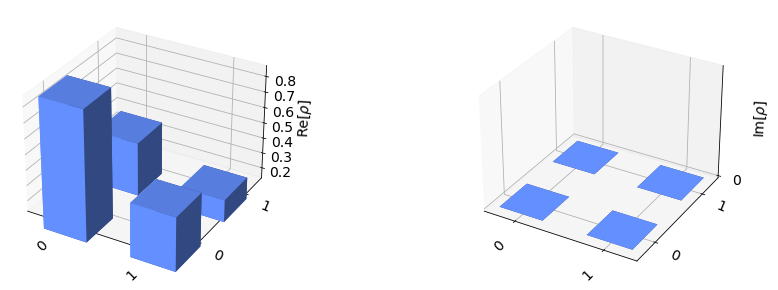

In [161]:
plot_state_city(psi)

## Q2

NoiseModel: Ideal


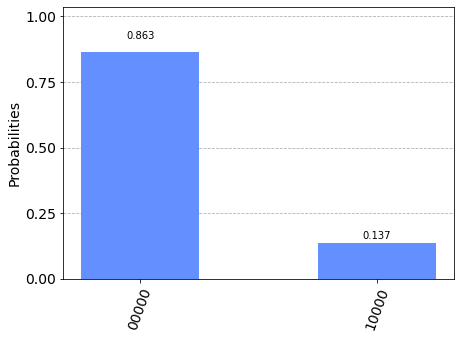

In [190]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import phase_damping_error, phase_amplitude_damping_error

from qiskit.providers.aer import AerSimulator

from qiskit.providers.aer.noise import pauli_error, depolarizing_error
p_gate1 = 0.0

# QuantumError objects
# error = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error = phase_damping_error(p_gate1)
# error = depolarizing_error(p_gate1, 1)

# Add errors to noise model
noise = NoiseModel()
noise.add_all_qubit_quantum_error(error, ["u1", "u2", "u3"])

print(noise)
sim_noise = AerSimulator(noise_model=noise)

# Transpile circuit for noisy basis gates
circ_tnoise = transpile(qc, sim_noise)
circ_tnoise.measure_all()

result_bit_flip = sim_noise.run(circ_tnoise).result()
counts_bit_flip = result_bit_flip.get_counts(0)

# Plot noisy output
plot_histogram(counts_bit_flip)

# qst = state_tomography_circuits(circ_tnoise, [n-1])
# job = execute(qst, sim_noise, shots=5000)
# tomo = StateTomographyFitter(job.result(), qst)
# rho = tomo.fit()
# # plot_state_city(rho)
# F_swap = state_fidelity(psi, rho)
# print('Fit Fidelity =', F_swap)

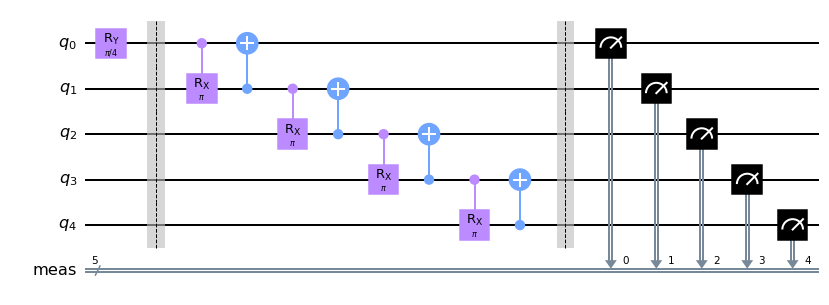

In [164]:
qc.measure_all()
qc.draw()

## Q3

Job Status: job has successfully run
{'00000': 599, '00001': 121, '10000': 128, '10001': 36, '10010': 20, '10011': 3, '10100': 4, '10101': 2, '10110': 2, '11000': 13, '11001': 5, '00010': 36, '00011': 14, '00100': 18, '00101': 4, '00110': 4, '00111': 2, '01000': 9, '01001': 1, '01100': 2, '01110': 1}


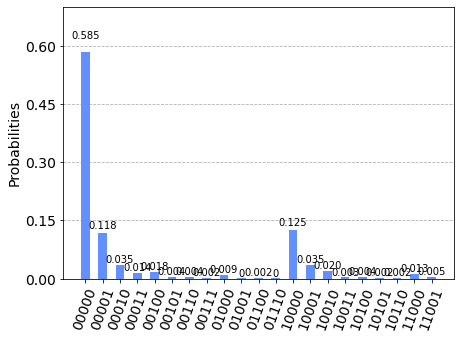

In [181]:
backend = provider.get_backend("ibmq_santiago")
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)
job_monitor(job)
exp_result = job.result()
exp_counts = exp_result.get_counts(qc)
print(exp_counts)
plot_histogram(exp_counts)

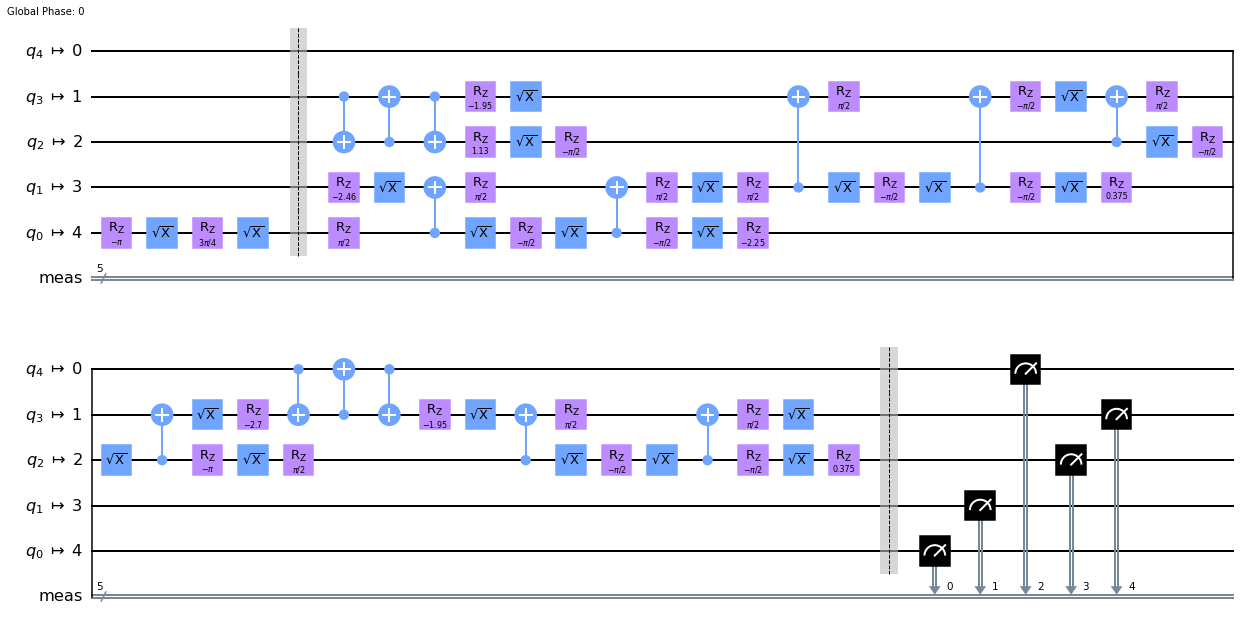

In [172]:
backend = provider.get_backend("ibmq_belem")
t_qc = transpile(qc, backend, optimization_level=3)
t_qc.draw()

In [180]:
backend = provider.get_backend("ibmq_santiago")
backend

<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-education', group='iit-madras-1', project='quantum-computin')>

# A5

In [31]:
import numpy as np
from qiskit.algorithms.linear_solvers.numpy_linear_solver import NumPyLinearSolver
from qiskit.algorithms.linear_solvers.hhl import HHL
matrix = np.array([[1, -1/3], [-1/3, 1]])
vector = np.array([1, 0])
naive_hhl_solution = HHL().solve(matrix, vector)

classical_solution = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector))
print('classical state:', classical_solution.state)

classical state: [1.125 0.375]


naive state:
        ┌──────────────┐┌──────┐        ┌─────────┐
q370_0: ┤ circuit-1676 ├┤2     ├────────┤2        ├
        └──────────────┘│      │┌──────┐│         │
q371_0: ────────────────┤0 QPE ├┤1     ├┤0 QPE_dg ├
                        │      ││      ││         │
q371_1: ────────────────┤1     ├┤0 1/x ├┤1        ├
                        └──────┘│      │└─────────┘
q372_0: ────────────────────────┤2     ├───────────
                                └──────┘           
tridiagonal state:
        ┌──────────────┐┌──────┐        ┌─────────┐
q387_0: ┤ circuit-1785 ├┤2     ├────────┤2        ├
        └──────────────┘│      │┌──────┐│         │
q388_0: ────────────────┤0 QPE ├┤1     ├┤0 QPE_dg ├
                        │      ││      ││         │
q388_1: ────────────────┤1     ├┤0 1/x ├┤1        ├
                        └──────┘│      │└─────────┘
q389_0: ────────────────────────┤2     ├───────────
                                └──────┘           


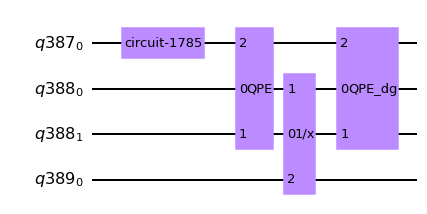

In [32]:
from qiskit.algorithms.linear_solvers.matrices.tridiagonal_toeplitz import TridiagonalToeplitz
tridi_matrix = TridiagonalToeplitz(1, 1, -1 / 3)

tridi_solution = HHL().solve(tridi_matrix, vector)
print('naive state:')
print(naive_hhl_solution.state)
print('tridiagonal state:')
print(tridi_solution.state)
tridi_solution.state.draw()

In [33]:
print('classical Euclidean norm:', classical_solution.euclidean_norm)
print('naive Euclidean norm:', naive_hhl_solution.euclidean_norm)
print('tridiagonal Euclidean norm:', tridi_solution.euclidean_norm)

classical Euclidean norm: 1.1858541225631423
naive Euclidean norm: 1.185854122563141
tridiagonal Euclidean norm: 1.185854122563142


In [34]:
from qiskit.quantum_info import Statevector

naive_sv = Statevector(naive_hhl_solution.state).data
tridi_sv = Statevector(tridi_solution.state).data

# Extract the right vector components. 1000 corresponds to the index 8 and 1001 corresponds to the index 9
naive_full_vector = np.array([naive_sv[8], naive_sv[9]])
tridi_full_vector = np.array([tridi_sv[8], tridi_sv[9]])

print('naive raw solution vector:', naive_full_vector)
print('tridi raw solution vector:', tridi_full_vector)


naive raw solution vector: [0.75-2.85534462e-16j 0.25-1.15007783e-16j]
tridi raw solution vector: [0.75-2.90566182e-17j 0.25+1.09287579e-16j]


In [36]:
naive_full_vector = np.real(naive_full_vector)
tridi_full_vector = np.real(tridi_full_vector)
print('full naive solution vector:', naive_hhl_solution.euclidean_norm*naive_full_vector/np.linalg.norm(naive_full_vector))
print('full tridi solution vector:', tridi_solution.euclidean_norm*tridi_full_vector/np.linalg.norm(tridi_full_vector))
print('classical state:', classical_solution.state)

full naive solution vector: [1.125 0.375]
full tridi solution vector: [1.125 0.375]
classical state: [1.125 0.375]


{'1001': 57, '0000': 196, '0001': 207, '1000': 564}


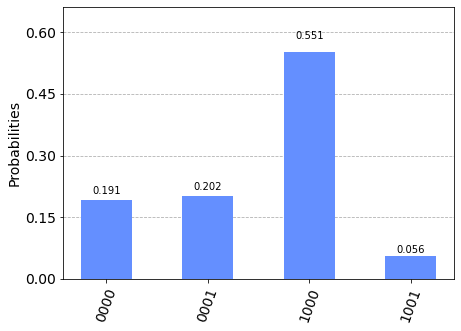

In [41]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

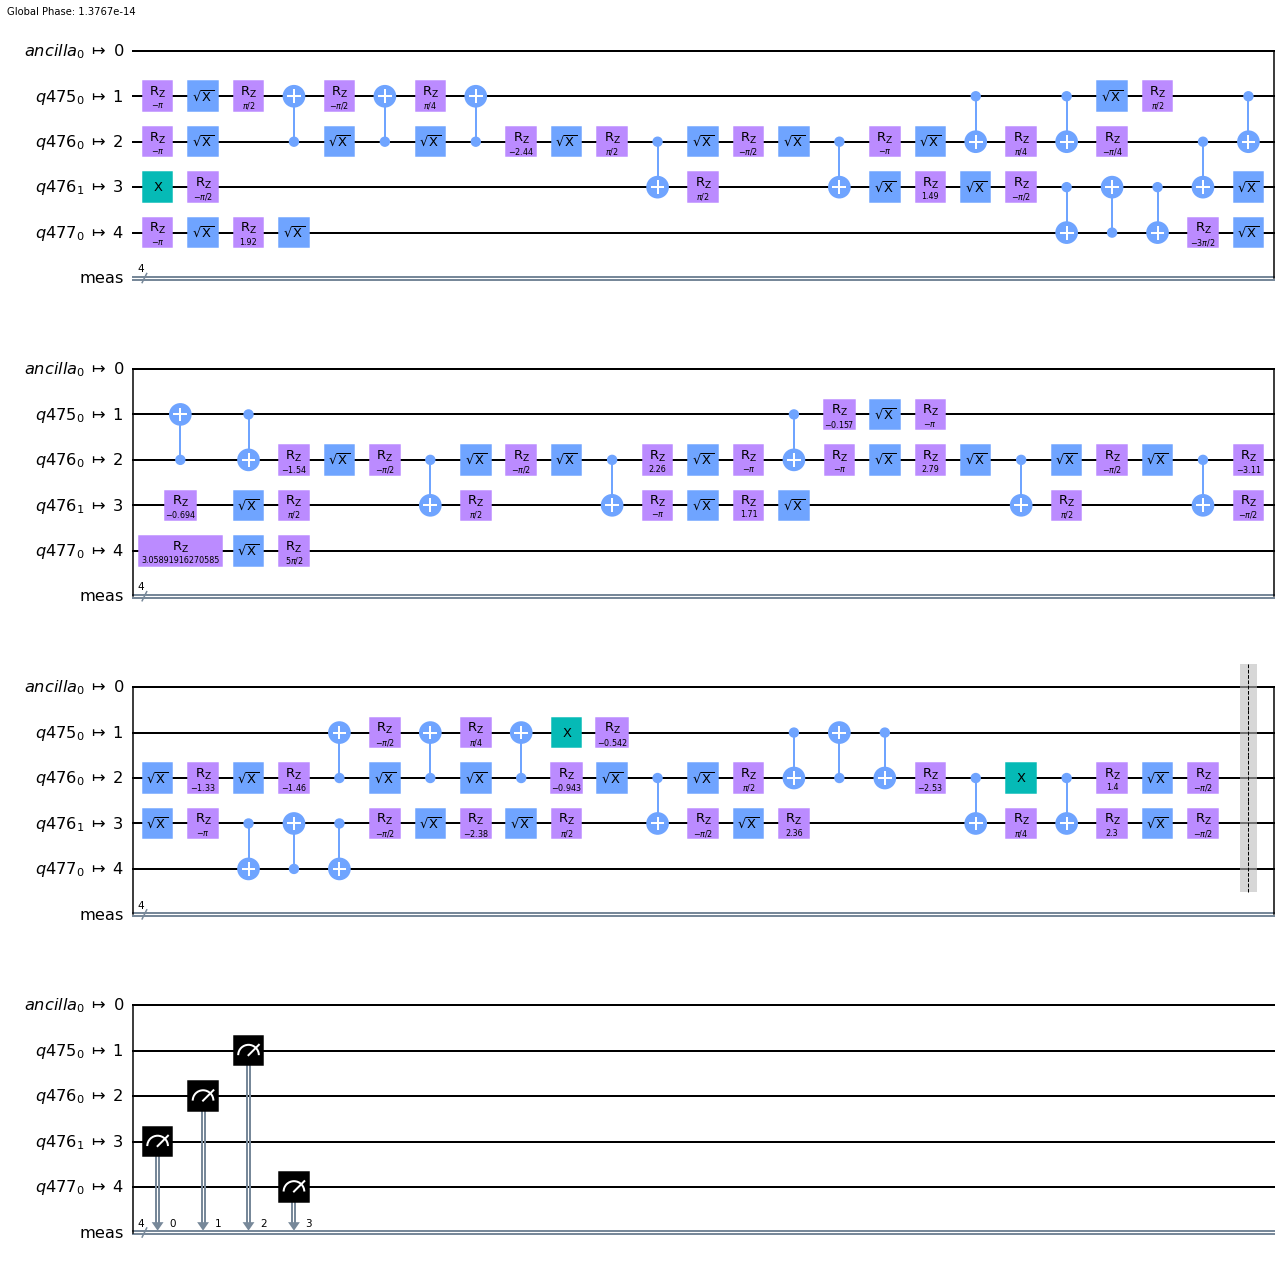

In [38]:
backend = provider.get_backend("ibmq_santiago")
qc = tridi_solution = HHL().solve(tridi_matrix, vector).state
qc.measure_all()
qc = transpile(qc, backend,optimization_level=3)
qc.draw()

Job Status: job has successfully run
{'0000': 175, '0001': 129, '0010': 77, '0011': 27, '0100': 30, '0101': 21, '0110': 22, '0111': 12, '1000': 306, '1001': 83, '1010': 22, '1011': 18, '1100': 17, '1101': 23, '1110': 24, '1111': 38}


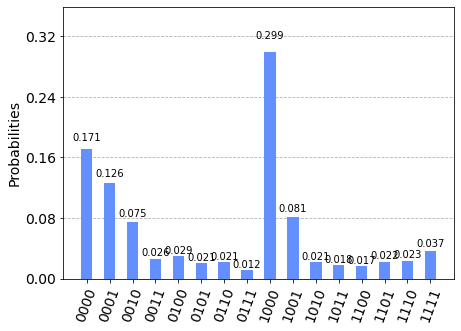

In [42]:
job = backend.run(qc)
job_monitor(job)
exp_result = job.result()
exp_counts = exp_result.get_counts(qc)
print(exp_counts)
plot_histogram(exp_counts)

Depth: 25
CNOTS: 10


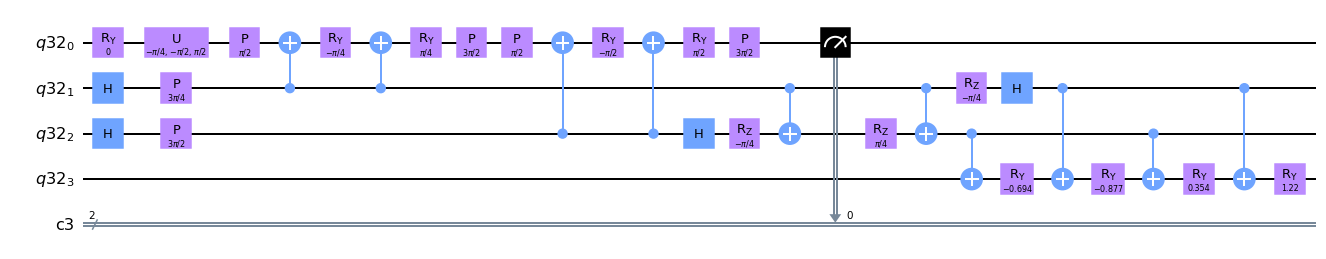

In [13]:
from qiskit import QuantumRegister, QuantumCircuit
import numpy as np

t = 2*np.pi*(3/8)  # This is not optimal; As an exercise, set this to the
       # value that will get the best results. See section 8 for solution.

nqubits = 4  # Total number of qubits
nb = 1  # Number of qubits representing the solution
nl = 2  # Number of qubits representing the eigenvalues

theta = 0  # Angle defining |b>

a = 1  # Matrix diagonal
b = -1/3  # Matrix off-diagonal

# Initialize the quantum and classical registers
qr = QuantumRegister(nqubits)
cr = ClassicalRegister(2)

# Create a Quantum Circuit
qc = QuantumCircuit(qr,cr)

qrb = qr[0:nb]
qrl = qr[nb:nb+nl]
qra = qr[nb+nl:nb+nl+1]

# State preparation. 
qc.ry(2*theta, qrb[0])
    
# QPE with e^{iAt}
for qu in qrl:
    qc.h(qu)

qc.p(a*t, qrl[0])
qc.p(a*t*2, qrl[1])

qc.u(b*t, -np.pi/2, np.pi/2, qrb[0])


# Controlled e^{iAt} on \lambda_{1}:
params=b*t

qc.p(np.pi/2,qrb[0])
qc.cx(qrl[0],qrb[0])
qc.ry(params,qrb[0])
qc.cx(qrl[0],qrb[0])
qc.ry(-params,qrb[0])
qc.p(3*np.pi/2,qrb[0])

# Controlled e^{2iAt} on \lambda_{2}:
params = b*t*2

qc.p(np.pi/2,qrb[0])
qc.cx(qrl[1],qrb[0])
qc.ry(params,qrb[0])
qc.cx(qrl[1],qrb[0])
qc.ry(-params,qrb[0])
qc.p(3*np.pi/2,qrb[0])

# Inverse QFT
qc.h(qrl[1])
qc.rz(-np.pi/4,qrl[1])
qc.cx(qrl[0],qrl[1])
qc.rz(np.pi/4,qrl[1])
qc.cx(qrl[0],qrl[1])
qc.rz(-np.pi/4,qrl[0])
qc.h(qrl[0])

# Eigenvalue rotation
t1=(-np.pi +np.pi/3 - 2*np.arcsin(1/3))/4
t2=(-np.pi -np.pi/3 + 2*np.arcsin(1/3))/4
t3=(np.pi -np.pi/3 - 2*np.arcsin(1/3))/4
t4=(np.pi +np.pi/3 + 2*np.arcsin(1/3))/4

qc.cx(qrl[1],qra[0])
qc.ry(t1,qra[0])
qc.cx(qrl[0],qra[0])
qc.ry(t2,qra[0])
qc.cx(qrl[1],qra[0])
qc.ry(t3,qra[0])
qc.cx(qrl[0],qra[0])
qc.ry(t4,qra[0])
qc.measure([0],[0])

print("Depth: %i" % qc.depth())
print("CNOTS: %i" % qc.count_ops()['cx'])
qc.draw(fold=-1)

In [11]:
from qiskit import ClassicalRegister, IBMQ
from qiskit.compiler import transpile
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, # Measurement error mitigation functions
                                                 CompleteMeasFitter, 
                                                 MeasurementFilter)

backend = provider.get_backend('ibmq_santiago') # calibrate using real hardware

# Transpiled circuit for the real hardware
qc_qa_cx = transpile(qc, backend=backend)
meas_cals, state_labels = complete_meas_cal(qubit_list=layout, qr=QuantumRegister(chip_qubits))
qcs = meas_cals + [qc_qa_cx]

job = backend.run(qcs, shots=10)

Traceback (most recent call last):
  File "<ipython-input-11-c7efe25f6773>", line 11, in <module>
    meas_cals, state_labels = complete_meas_cal(qubit_list=layout, qr=QuantumRegister(chip_qubits))
NameError: name 'layout' is not defined

Use %tb to get the full traceback.


Job Status: job has successfully run
{'0000': 22, '0001': 36, '0010': 17, '0011': 6, '0100': 25, '0101': 21, '0110': 418, '0111': 10, '1000': 36, '1001': 295, '1010': 11, '1011': 82, '1100': 2, '1101': 16, '1110': 25, '1111': 2}


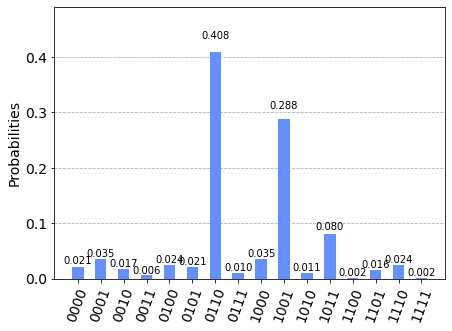

In [32]:
backend = provider.get_backend("ibmq_santiago")
qc = transpile(qc, backend,optimization_level=3)
job = backend.run(qc)
job_monitor(job)
exp_result = job.result()
exp_counts = exp_result.get_counts(qc)
print(exp_counts)
plot_histogram(exp_counts)

In [46]:
c = 0
for key,value in exp_counts.items():
    if key[3] == '1':
        c += value        

print(c)

480


{'01': 541, '00': 483}


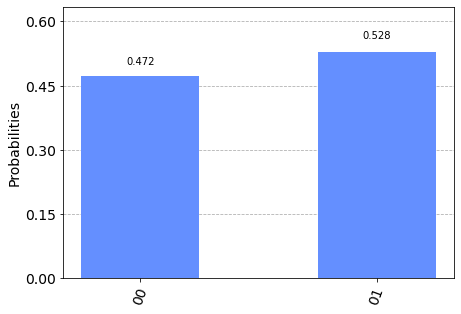

In [14]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

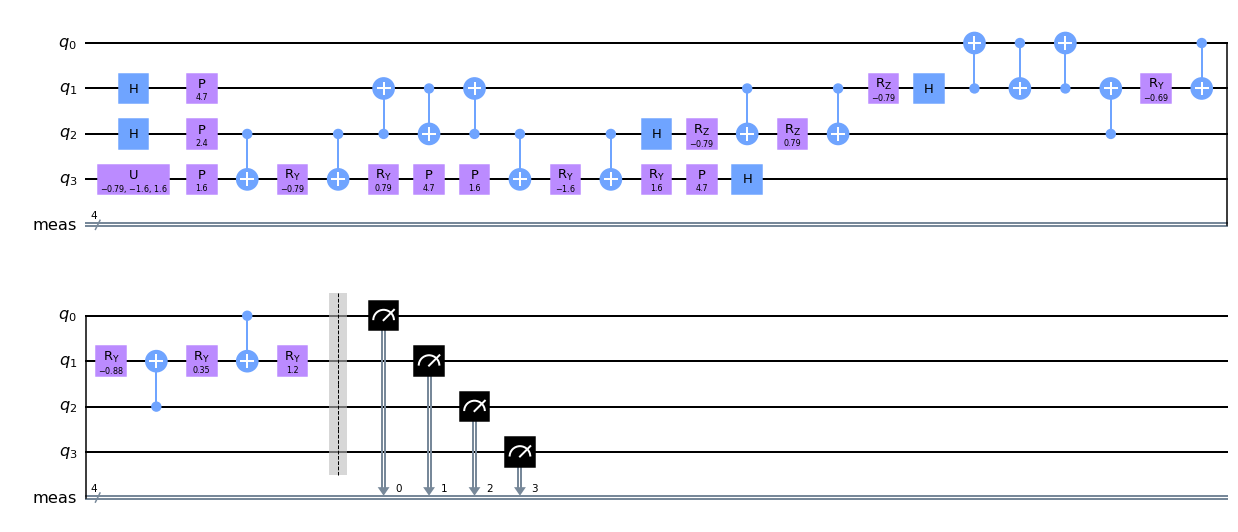

In [30]:
qc = QuantumCircuit(4)
qc.u(-0.79,-1.6,1.6,3)
qc.h([1,2])
qc.p(4.7,1)
qc.p(2.4,2)
qc.p(1.6,3)
qc.cx(2,3)
qc.ry(-0.79,3)
qc.cx(2,3)
qc.ry(0.79,3)
qc.cx(2,1)
qc.cx(1,2)
qc.p(4.7,3)
qc.cx(2,1)
qc.p(1.6,3)
qc.cx(2,3)
qc.ry(-1.6,3)
qc.cx(2,3)
qc.h(2)
qc.ry(1.6,3)
qc.p(4.7,3)
qc.rz(-0.79,2)
qc.cx(1,2)
qc.rz(0.79,2)
qc.cx(1,2)
qc.rz(-0.79,1)
qc.h(1)
qc.cx(1,0)
qc.cx(0,1)
qc.cx(1,0)
qc.cx(2,1)
qc.ry(-0.69,1)
qc.cx(0,1)
qc.ry(-0.88,1)
qc.cx(2,1)
qc.ry(0.35,1)
qc.cx(0,1)
qc.ry(1.2,1)
qc.h(3)
qc.measure_all()
qc.draw()

{'1011': 122, '1001': 360, '0000': 1, '0110': 541}


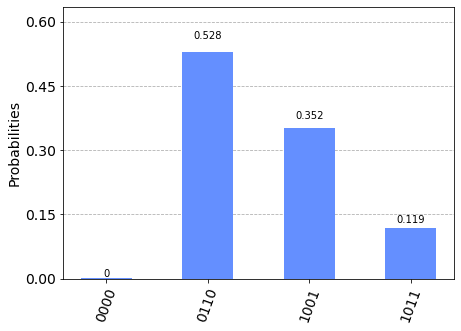

In [31]:
er_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)